In [4]:
#show plots in the notebook
%matplotlib inline

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm, neighbors, linear_model, grid_search

# The digits dataset
digits = datasets.load_digits()

print ("Digits data set, data shape = ", digits.data.shape)
print(digits.data)

('Digits data set, data shape = ', (1797L, 64L))
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


('first item as 8x8 array - represents value ', 0)


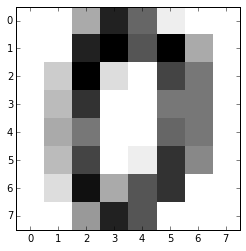

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [5]:
print ("first item as 8x8 array - represents value ", digits.target[0])
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# to see the array
digits.images[0]

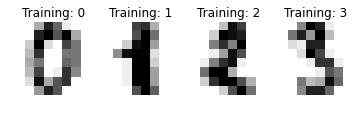

In [6]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [10]:
# Create a classifier: a support vector classifier
#classifier = svm.SVC(gamma=0.001)
#classifier = neighbors.KNeighborsClassifier()
#classifier = linear_model.LogisticRegression()


tuned_parameters = {'penalty': ['l1'], 'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4, 1e5]}
score = 'accuracy'


In [11]:
# We learn the digits on the first half of the digits
#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

print("# Tuning hyper-parameters for %s" % score)

clf = grid_search.GridSearchCV(linear_model.LogisticRegression(), tuned_parameters, cv=5, scoring=score)
clf.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

print("Best parameters set found on development set:")
print()
print(clf.best_estimator_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() / 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
()
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)
()
Grid scores on development set:
()
0.100 (+/-0.001) for {'penalty': 'l1', 'C': 0.0001}
0.626 (+/-0.028) for {'penalty': 'l1', 'C': 0.001}
0.861 (+/-0.017) for {'penalty': 'l1', 'C': 0.01}
0.911 (+/-0.014) for {'penalty': 'l1', 'C': 0.1}
0.902 (+/-0.016) for {'penalty': 'l1', 'C': 1}
0.890 (+/-0.019) for {'penalty': 'l1', 'C': 10}
0.890 (+/-0.015) for {'penalty': 'l1', 'C': 100}
0.886 (+/-0.009) for {'penalty': 'l1', 'C': 1000}
0.891 (+/-0.007) for {'penalty': 'l1', 'C': 10000.0}
0.886 (+/-0.006) for {'penalty': 'l1', 'C': 100000.0}


In [15]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
y_true, y_pred = expected, clf.predict(data[n_samples/2:])


In [16]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_true, y_pred)))

Classification report for classifier GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000.0, 100000.0]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.96      0.97        91
          2       0.99      0.99      0.99        86
          3       0.98      0.90      0.94        91
          4       0.99      0.96      0.97        92
          5       0.95      0.96      0.95        91
          6       0.99      0.99      0.99      

In [17]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_true, y_pred))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


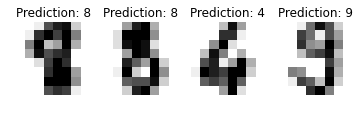

In [18]:
images_and_predictions = list(zip(digits.images[n_samples / 2:], y_pred))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()